In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

from pixelsmith_pipeline import generate_image

/home/thanos/.conda/envs/infstable/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.45it/s]



Generating:  1024 x 1024


100%|██████████| 50/50 [00:06<00:00,  7.91it/s]


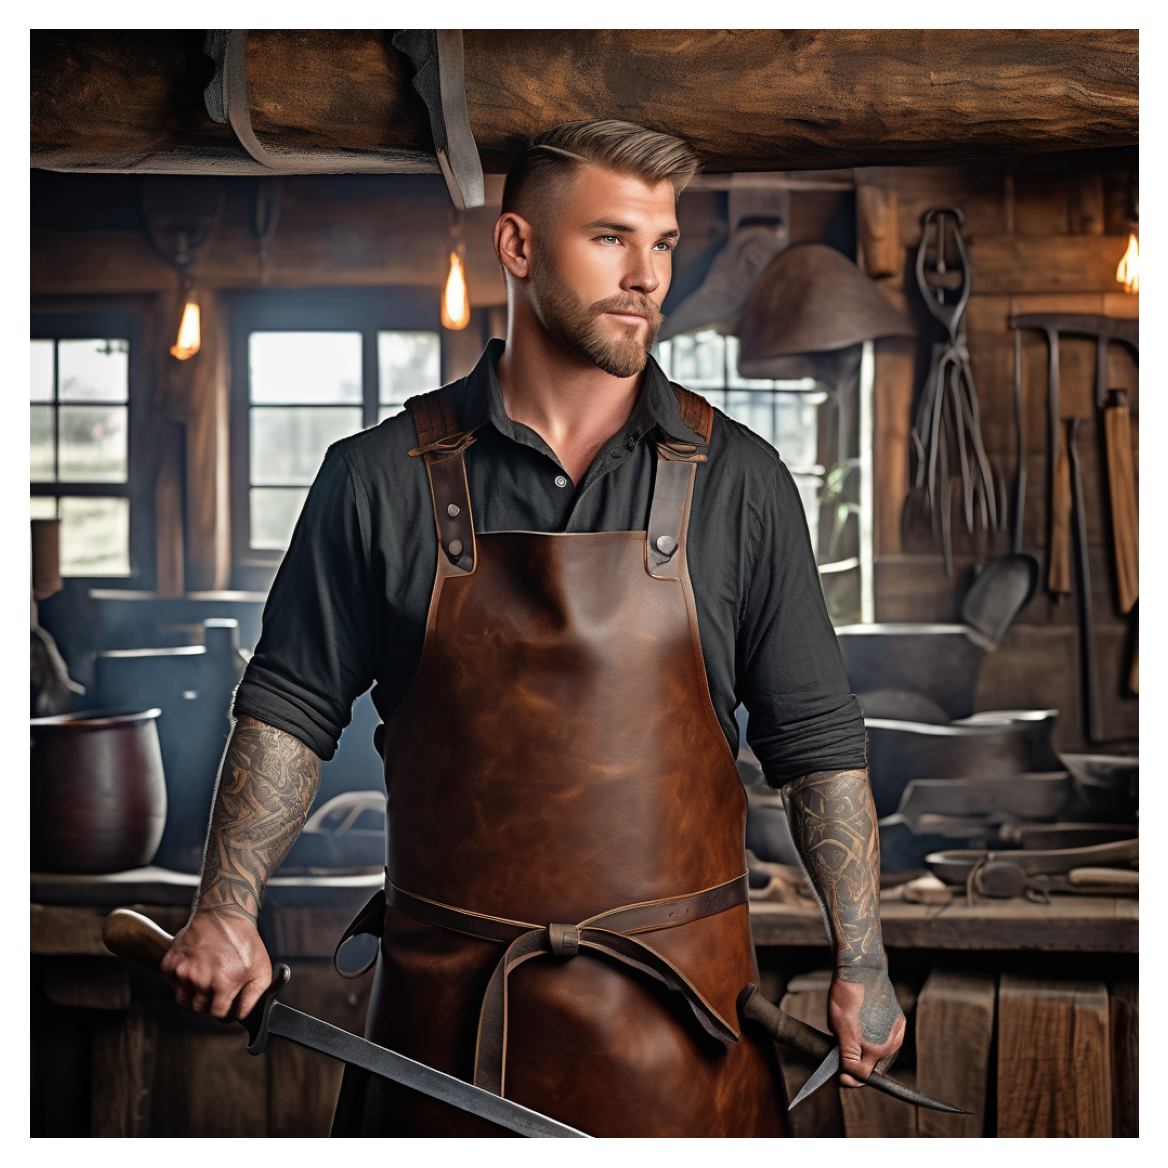

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]



Generating:  2048 x 2048
 Generation process 100.00%

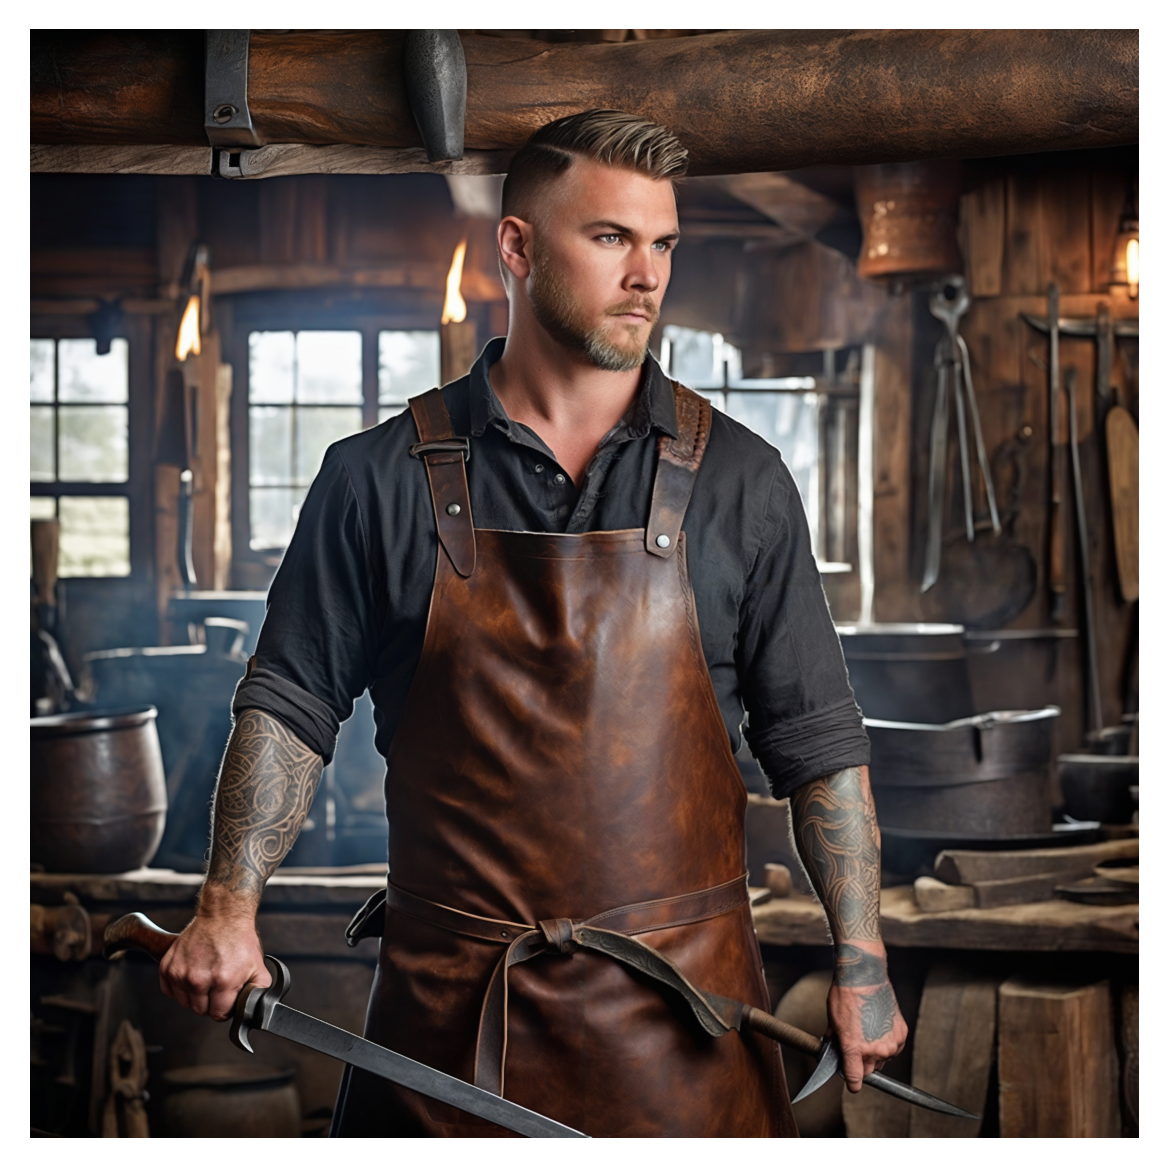

Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.47it/s]



Generating:  4096 x 4096
 Generation process 100.00%

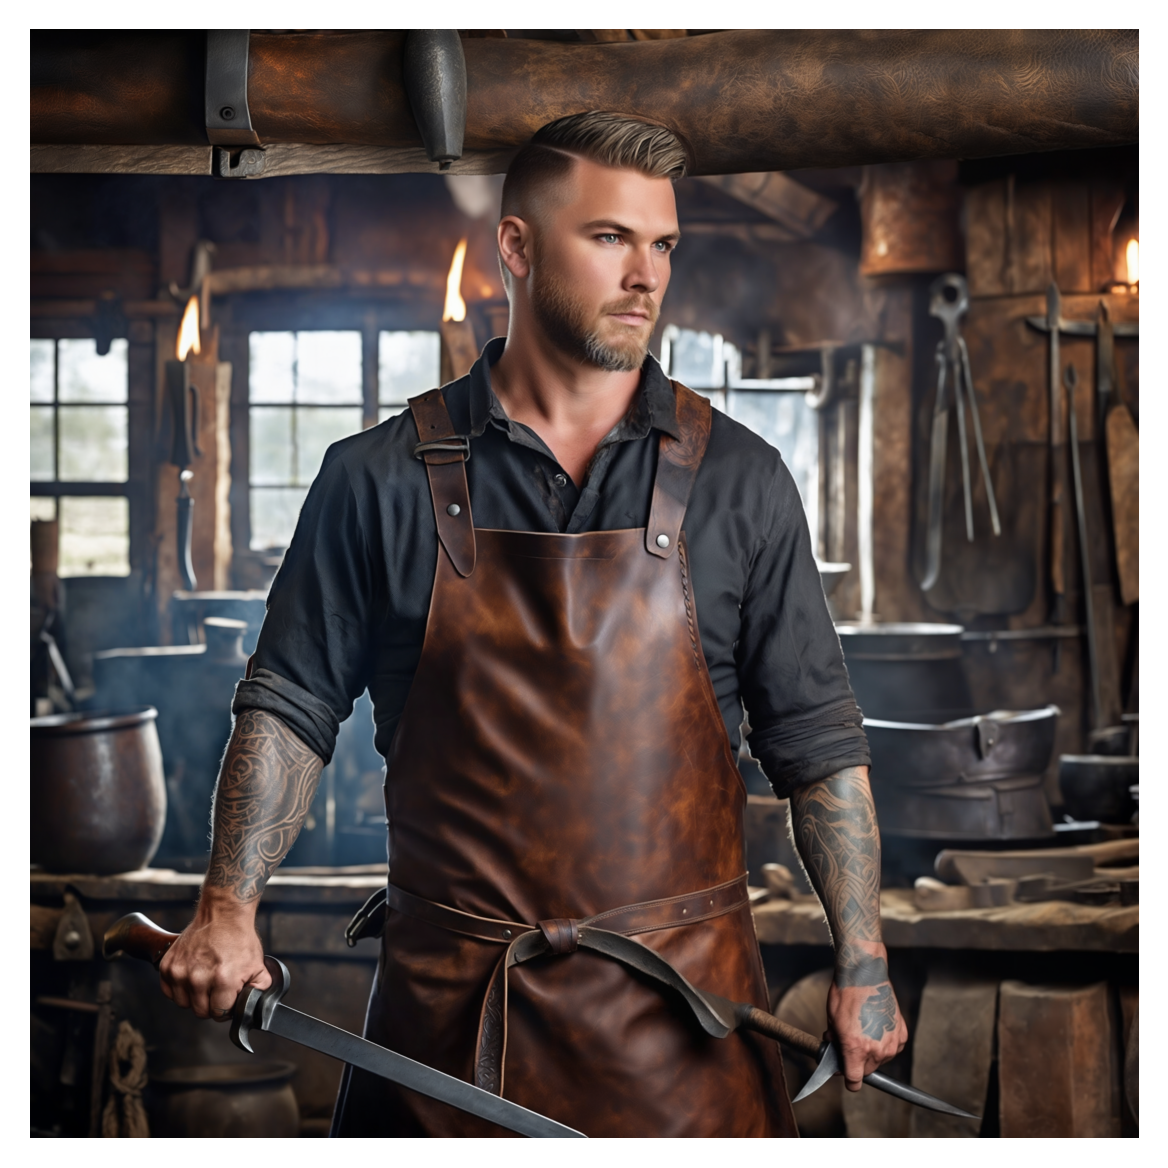

In [469]:
prompt = "photo, blacksmith, viking braid, leather apron, forge background, tattoos, perfect anatomy, highly detailed"
negative_prompt = "bad analogy, dysmorphia, ugly, low quality, low resolution, bad fingers, bad hands, bad anatomy, naked, nudity, necklace, bracelet"

# starting resolution, also sets the ratio
h_res = 1024
w_res = 1024

seed=1643170768

# base resolution
base_image = generate_image(seed=seed, prompt=prompt, negative_prompt=negative_prompt, h_res=h_res, w_res=w_res, guidance_scale=10)

# # base resolution * 2
hr_image_2 = generate_image(seed=seed, prompt=prompt, negative_prompt=negative_prompt, h_res=int(h_res*2), w_res=int(w_res*2), image=base_image, slider=22)

# # base resolution * 4
hr_image_4 = generate_image(seed=seed, prompt=prompt, negative_prompt=negative_prompt, h_res=int(h_res*4), w_res=int(w_res*4), image=hr_image_2, slider=34)

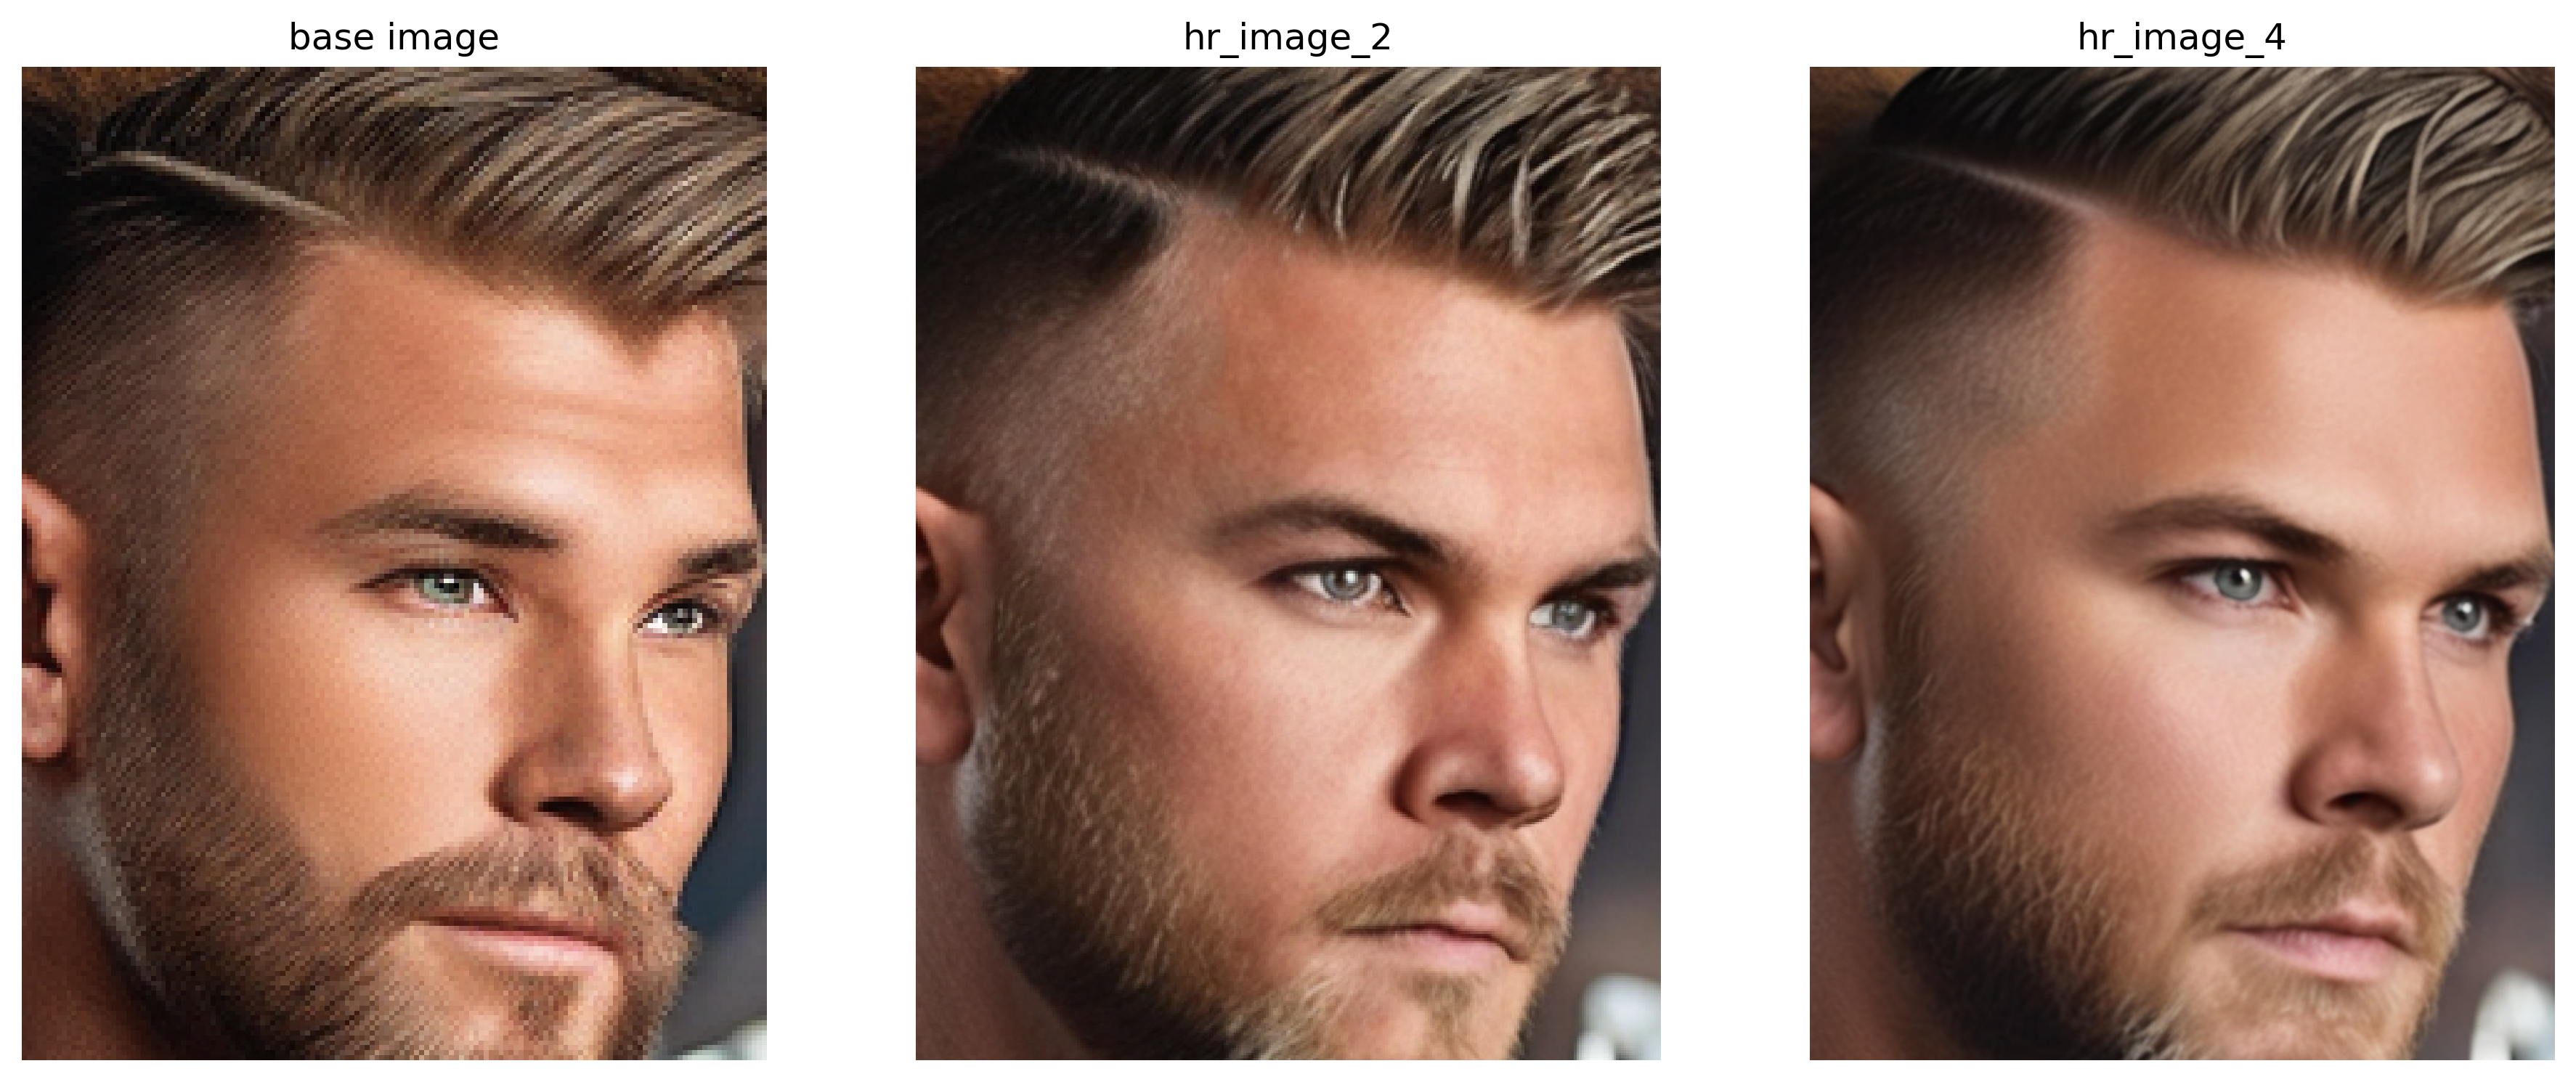

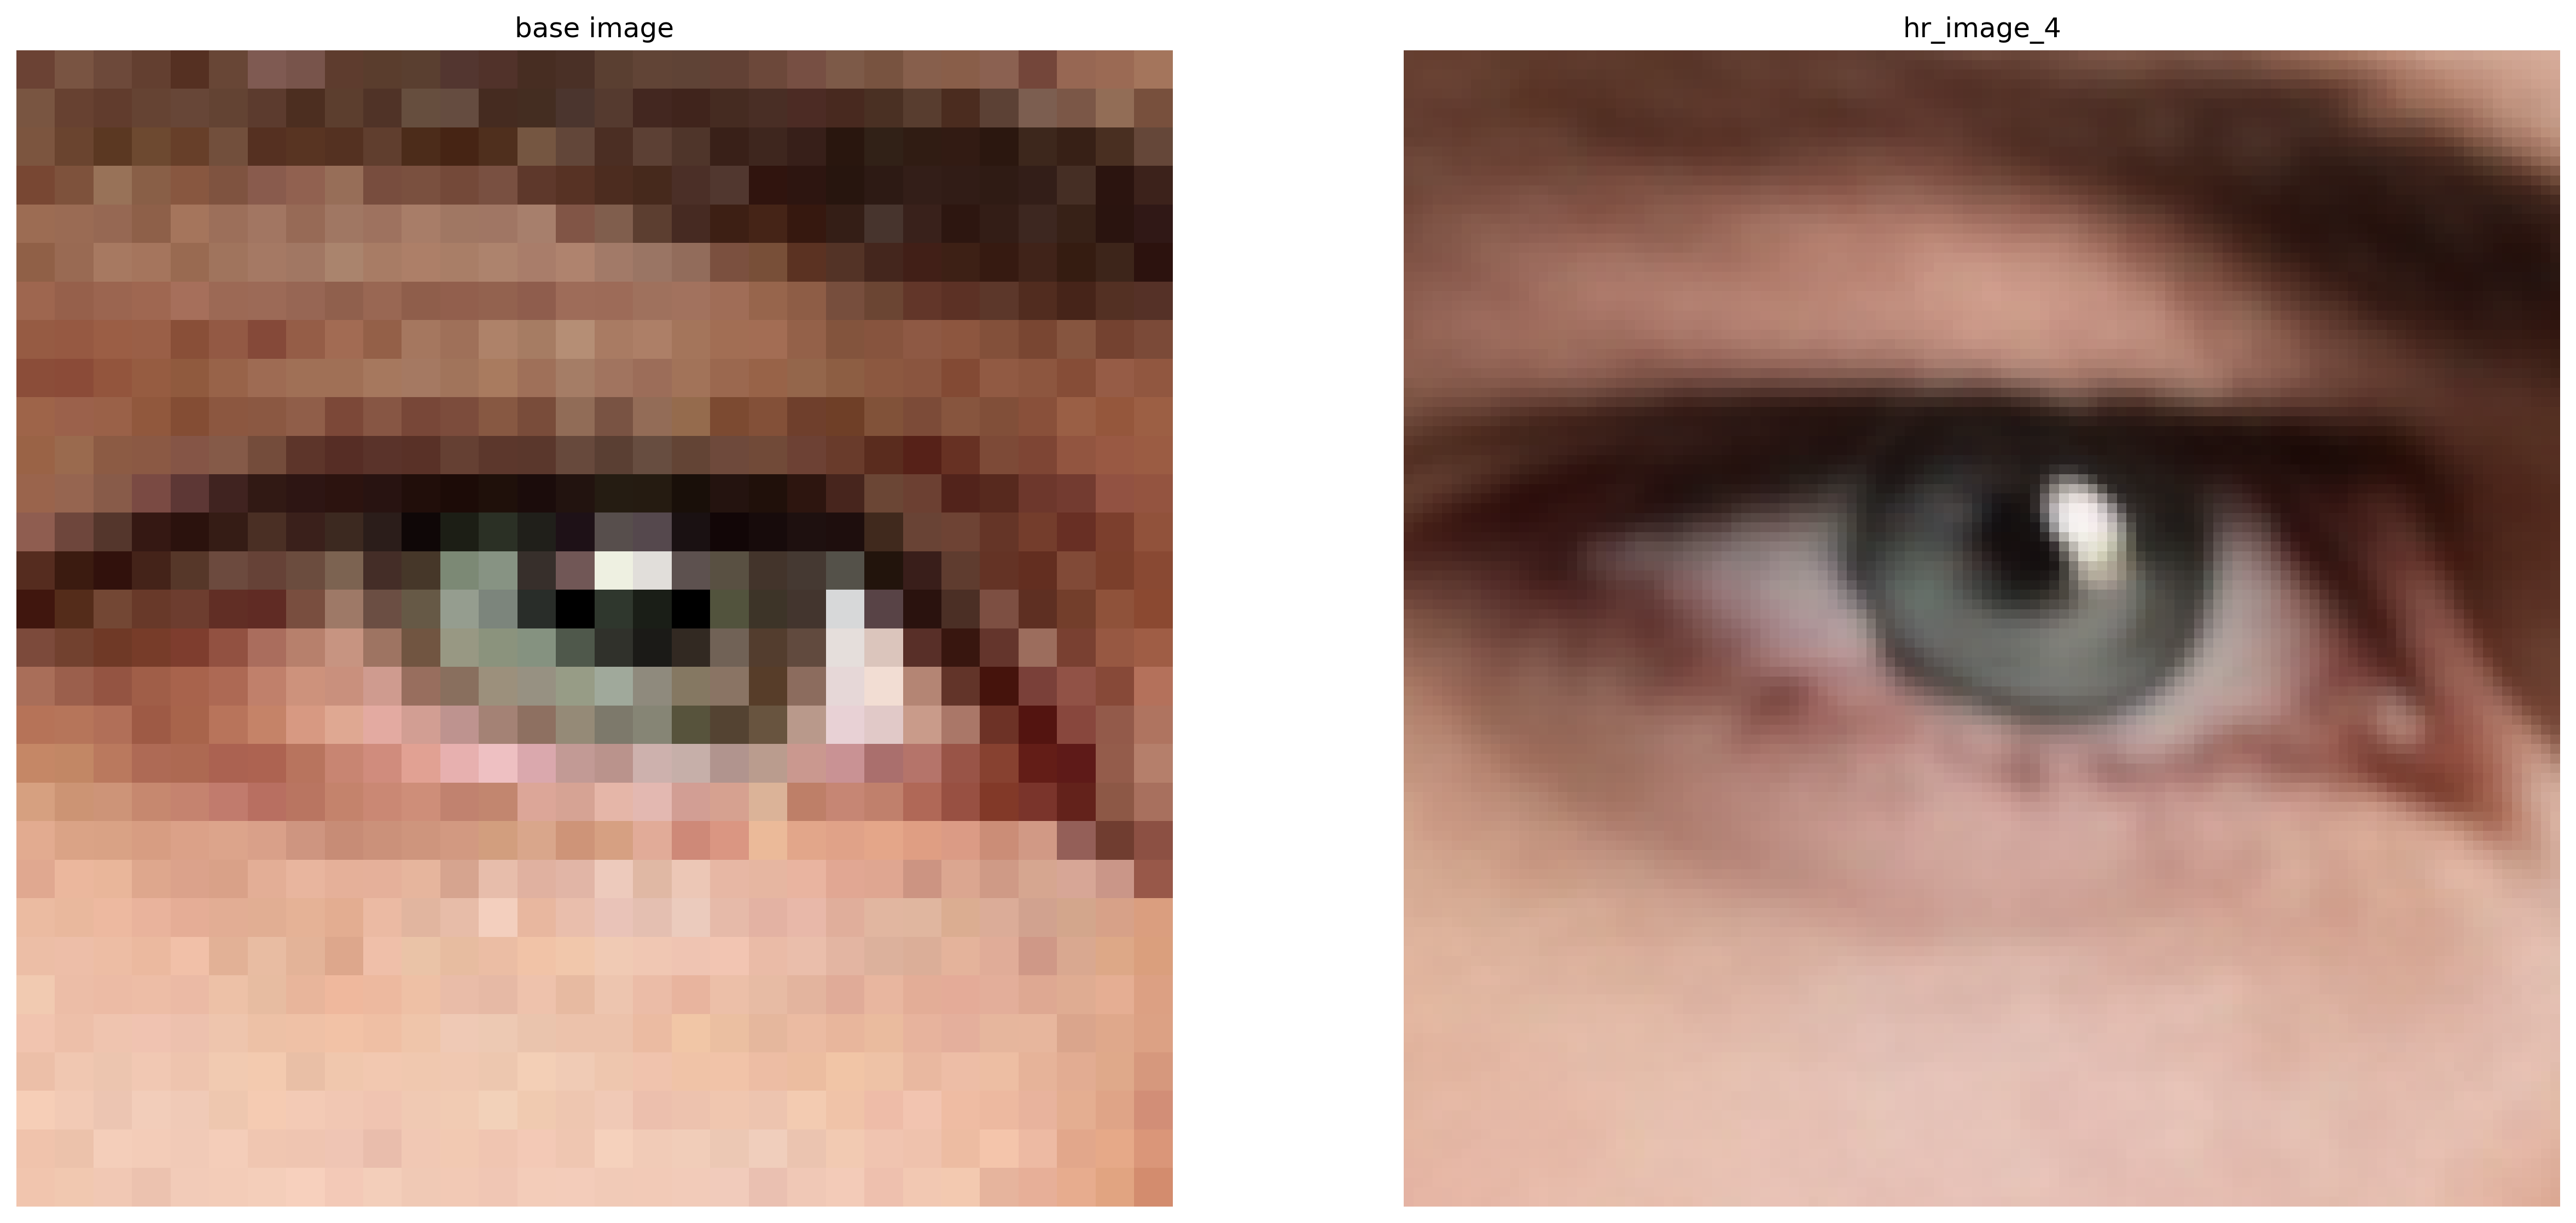

In [488]:
# plot zoomed-in images for all resolutions

# close up on of the head
y1 = 90
y2 = y1 + 200
x1 = 450
x2 = x1 + 150

fig, axs = plt.subplots(1, 3, figsize=(15, 20))
axs[0].imshow(np.array(base_image)[y1:y2, x1:x2])
axs[0].set_title("base image")
axs[0].axis("off")
axs[1].imshow(np.array(hr_image_2)[y1*2:y2*2, x1*2:x2*2])
axs[1].set_title("hr_image_2")
axs[1].axis("off")
axs[2].imshow(np.array(hr_image_4)[y1*4:y2*4, x1*4:x2*4])
axs[2].set_title("hr_image_4")
axs[2].axis("off")
plt.show()

# close up of the right side eyebrow
y1 = 180
y2 = y1 + 30
x1 = 520
x2 = x1 + 30

fig, axs = plt.subplots(1, 2, figsize=(20, 20))
axs[0].imshow(np.array(base_image)[y1:y2, x1:x2])
axs[0].set_title("base image")
axs[0].axis("off")
axs[1].imshow(np.array(hr_image_4)[y1*4:y2*4, x1*4:x2*4])
axs[1].set_title("hr_image_4")
axs[1].axis("off")
plt.show()
